Exploring Dataset


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Importing dataset to pandas dataframe
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv') 


In [2]:
# Exploring dataframe 
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# Exploring dataframe info such as missing values, number of entries, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.describe()[["temp","rain_1h","snow_1h","clouds_all","traffic_volume"]]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


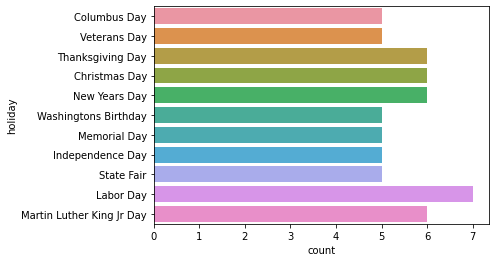

In [27]:
ax = sb.countplot(y="holiday", data = df.mask(df.eq("None")))
ax.tick_params(axis='x', rotation = 0)

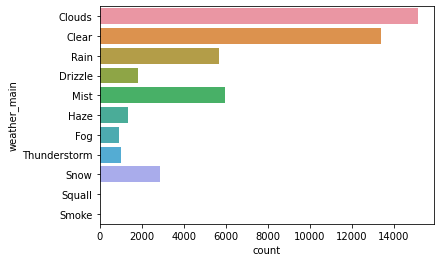

In [28]:
ax = sb.countplot(y="weather_main", data=df)
ax.tick_params(axis='x', rotation=0)


Cleaning dataset by applying tranformation and removing outliers

In [3]:
df_clean = df.copy()
# converting holiday to boolean 0 and 1 for initial analysis
df_clean['holiday'] = np.where(df_clean['holiday'] == 'None', 0, 1)
df_clean['holiday'].astype("category")
df_clean.rename(columns={'weather_main': 'weather'},
                inplace=True)  # renaming for convention purpose
df_clean['weather'].astype("category")
# dropping weather description as it's redundant
df_clean.drop('weather_description', axis=1, inplace=True)
df_clean['temp'] = (df_clean['temp'] - 273.15)  # converting kelvin to celsius
# filtering out outliers as recorded lowest temp in MN, USA is -60 C
df_clean = df_clean[df_clean['temp'] >= -60]
# filtering out outliers as recorded highest rainfall in MN, USA is 232 MM
df_clean = df_clean[df_clean['rain_1h'] < 232]
# converting datetime string to datetime datatype
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'])
df_clean['month'] = df_clean['date_time'].dt.month  # adding a month column
df_clean['month'].astype("category")
# adding a column for day of the week
df_clean['weekday'] = df_clean['date_time'].dt.dayofweek
df_clean['weekday'].astype("category")
# adding a column for hour of the day
df_clean['hour'] = df_clean['date_time'].dt.hour
df_clean['hour'].astype("category")
# removing duplicate date_time
df_clean = df_clean.groupby('date_time').first()


Exporting cleaned dataset for further analysis in R

In [4]:
df_clean.to_csv("Metro_Interstate_Traffic_Volume_CLEANED.csv", index = False)